# Funciones de activación

A continuación vamos a ver las funciones de activación más comunes

## Threshold

Es la más sencilla, supone establecer un límite

$$
\begin{aligned}
  & y = 
  \begin{cases}
    x & \textrm{si }x > threshold \\ 
    valor & \textrm{si }x \leq threshold
  \end{cases}
\end{aligned}
$$

```python
torch.nn.Threshold(threshold, value, inplace=False)
```

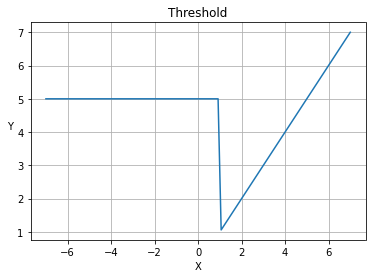

In [6]:
import torch
import matplotlib.pyplot as plt

activation = torch.nn.Threshold(1, 5)
x = torch.linspace(-7, 7, 100)
y = activation(x)

plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('Y  ', rotation=0)
plt.title('Threshold')
plt.grid(True)
plt.show()

## Tangente hiperbólica (tanh)

Aplica la tangente hiperbólica

$$
tanh\left(x\right) = \frac{exp\left(x\right)-exp\left(-x\right)}{exp\left(x\right)+exp\left(-x\right)}
$$

```python
torch.nn.Tanh()
```

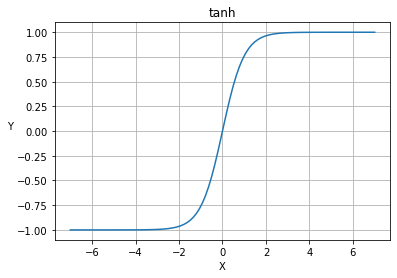

In [7]:
import torch
import matplotlib.pyplot as plt

activation = torch.nn.Tanh()
x = torch.linspace(-7, 7, 100)
y = activation(x)

plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('Y  ', rotation=0)
plt.title('tanh')
plt.grid(True)
plt.show()

## Sigmoide

Aplica la función sigmoide

$$
\sigma\left(x\right) = \frac{1}{1+exp\left(-x\right)}
$$

```python
torch.nn.Sigmoid()
```

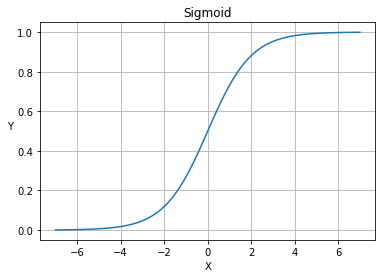

In [9]:
import torch
import matplotlib.pyplot as plt

activation = torch.nn.Sigmoid()
x = torch.linspace(-7, 7, 100)
y = activation(x)

plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('Y  ', rotation=0)
plt.title('Sigmoid')
plt.grid(True)
plt.show()

## ReLU

Aplica la función ReLU (rectified linear unit)

$$
ReLU\left(x\right) = max\left(0,x\right)
$$

```python
torch.nn.ReLU()
```

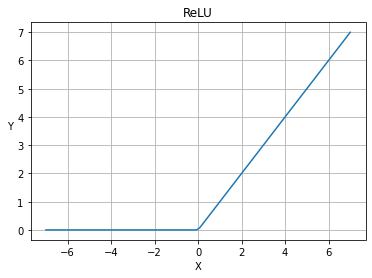

In [10]:
import torch
import matplotlib.pyplot as plt

activation = torch.nn.ReLU()
x = torch.linspace(-7, 7, 100)
y = activation(x)

plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('Y  ', rotation=0)
plt.title('ReLU')
plt.grid(True)
plt.show()

A partir de la ReLU se han desarrollado otras como la [ELU](https://pytorch.org/docs/stable/generated/torch.nn.ELU.html#torch.nn.ELU), [Leaky ReLU](https://pytorch.org/docs/stable/generated/torch.nn.LeakyReLU.html#torch.nn.LeakyReLU), [PReLU](https://pytorch.org/docs/stable/generated/torch.nn.PReLU.html#torch.nn.PReLU), [ReLU6](https://pytorch.org/docs/stable/generated/torch.nn.ReLU6.html#torch.nn.ReLU6), [RReLU](https://pytorch.org/docs/stable/generated/torch.nn.RReLU.html#torch.nn.RReLU), [SELU](https://pytorch.org/docs/stable/generated/torch.nn.SELU.html#torch.nn.SELU), [CELU](https://pytorch.org/docs/stable/generated/torch.nn.CELU.html#torch.nn.CELU), [GELU](https://pytorch.org/docs/stable/generated/torch.nn.GELU.html#torch.nn.GELU) o [SILU](https://pytorch.org/docs/stable/generated/torch.nn.SiLU.html#torch.nn.SiLU)

## Softmax

Se suele utilizar en la última capa.

Cuando se tiene una red de clasificación de varias clases, una vez se tiene el valor de predicción de cada neurona (logits), se aplica una softmax para calcular el porcentaje de certeza de cada neurona, y así quedarnos con la que mayor porcentaje tenga

$$
Softmax\left(x_i\right) = \frac{exp\left(x_i\right)}{\sum_{j=1}^{C} exp\left(x_j\right)}
$$

```python
torch.nn.Softmax(dim=None)
```

Cuando en Pytorch tenemos el parámetro `dim` establecemos a qué dimensión de la matriz queremos aplicar la función que estemos usando. En este caso, establecemos a qué dimensión aplicar la Softmax. Si `dim = 0` lo estamos aplicando a las columnas, si `dim = 1` lo estamos aplicando a las filas, y si `dim` es un número mayor lo estamos aplicando a la dimensión que corresponda de la matriz

Definimos una matriz que representa las predicciones de la red neuronal

In [25]:
import torch

logits = torch.randn(1, 3)
logits

tensor([[-0.8011,  0.2568, -0.6337]])

Aplicamos la Softmax a las columnas

In [26]:
activation = torch.nn.Softmax(dim=1)

output = activation(logits)
output

tensor([[0.1975, 0.5690, 0.2335]])

Como se puede ver, se ha obtenido el porcentaje de confianza de cada clase, ya que si sumamos todos los valores obtenemos 1

In [28]:
output.sum()

tensor(1.)

Esto sucede porque la función `exp()` siempre es un número positivo, como se puede ver a continuación

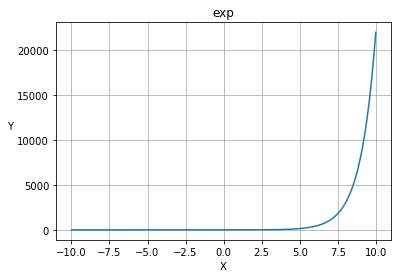

In [33]:
import torch
import matplotlib.pyplot as plt

x = torch.linspace(-10, 10, 1000)
y = torch.exp(x)

plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('Y  ', rotation=0)
plt.title('exp')
plt.grid(True)
plt.show()

Por tanto, en la función Softmax, cada predicción de cada neurona $\left(Softmax\left(x_i\right)\right)$ va a tener en el numerador un número positivo $\left(exp\left(x_i\right)\right)$ y en el denominador la suma de todos los `exp()` de todas las neuronas $\left(\sum_{j=1}^{C} exp\left(x_j\right)\right)$